In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import statistics

import matplotlib.style

import matplotlib

matplotlib.style.use('classic')

In [2]:
path='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Datafiles/sgparsclkazr1kolliasC1.c1.20110514.000000.nc'
kazr=Dataset(path,'r')
kazr

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    command_line: idl -R -n kazrarscl -s sgp -f C1 -b 20110514 --asynchronous
    Conventions: ARM-1.1
    process_version: vap-kazrarscl-0.5-0.el6
    dod_version: arsclkazr1kollias-c1-1.5
    site_id: sgp
    platform_id: arsclkazr1kollias
    facility_id: C1
    data_level: c1
    location_description: Southern Great Plains (SGP), Lamont, Oklahoma
    datastream: sgparsclkazr1kolliasC1.c1
    input_datastreams: sgpceilC1.b1 : 1.0 : 20110514.000005
sgpkazrcorgeC1.c1 : 1.6 : 20110514.000001
sgpkazrcormdC1.c1 : 1.6 : 20110514.000001
sgp30smplcmask1zwangC1.c1 : 0.4 : 20110514.000007
sgpmwrret1liljclouC1.c1 : 3.2 : 20110514.000009
sgporgC1.b1 : 2.0 : 20110514.000000
    radar_polarization_status: dual polarization
    radar_operating_frequency: 34.890000 GHz
    radar_modes_in_use: md ge
    maximum_clutter_height: 5000.0 m
    doi: 10.5439/1228768
    history: created by user ttoto on machin

In [3]:
path='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Datafiles/sgpmicrobasekaplusC1.c1.20110514.000000.nc'
mbase=Dataset(path,'r')
mbase

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    command_line: microbasekaplus -s sgp -f C1 -b 20110422 -e 20110607 -D 2 -R
    Conventions: ARM-1.1
    process_version: $
    dod_version: microbasekaplus-c1-0.0
    input_datastreams: sgparsclkazr1kolliasC1.c1 : 0.5 : 20110514.000000
sgpmwrret1liljclouC1.c1 : 3.2 : 20110514.000009
sgpinterpolatedsondeC1.c1 : 6.6 : 20110514.000030
    site_id: sgp
    platform_id: microbasekaplus
    facility_id: C1
    data_level: c1
    location_description: Southern Great Plains (SGP), Lamont, Oklahoma
    datastream: sgpmicrobasekaplusC1.c1
    doi: 
    history: created by user mwang on machine copper at 2018-04-25 10:31:53, using $
    dimensions(sizes): time(21600), bound(2), height(596)
    variables(dimensions): int32 base_time(), float64 time_offset(time), float64 time(time), float64 time_bounds(time,bound), float32 height(height), float32 height_bounds(height,bound), float32 liquid_water_con

In [4]:
path='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Datafiles/sgp10rlprofbe1newsC1.c1.20110514.000500.cdf'
rlid=Dataset(path,'r')
rlid

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    process_version: $State: vap-rlprof_be-0.2-0.sol5_10 $
    command_line: /apps/process/bin/rlprof_be10 -f C1 -s sgp -d 20110514
    site_id: sgp
    facility_id: C1
    dod_version: 0.1
    qc_standards_version: 1.0
    mr_version: $State: vap-rlprof_mr-1.2-0.sol5_10 $
    asr_version: $State: vap-rlprof_asr-3.10-0.sol5_10 $
    ext_version: $State: vap-rlprof_ext-0.6-0.sol5_10 $
    dep_version: $State: vap-rlprof_dep-1.2-0.sol5_10 $
    mr_command_line: /apps/process/bin/rlprof_mr10 -f C1 -s sgp -A -d 20110513
    asr_command_line: /apps/process/bin/rlprof_asr10 -f C1 -s sgp -d 20110513
    ext_command_line: /apps/process/bin/rlprof_ext10 -f C1 -s sgp -d 20110513
    dep_command_line: /apps/process/bin/rlprof_dep10 -f C1 -s sgp -d 20110513
    averaging_time: 10
    input_datastreams_description: A string consisting of the datastream(s), datastream version(s), and datastream date (ran

In [5]:
hk=np.ma.filled(kazr['height'][:])
tk=np.ma.filled(kazr['time'][:])
hm=np.ma.filled(mbase['height'][:])
tm=np.ma.filled(mbase['time'][:])
hr=np.ma.filled(rlid['height'][:])*1000
tr=np.ma.filled(rlid['time'][:])

# 1
Plots of velocity and reflectivity for KAZRARSCL

In [6]:
v_k=np.ma.filled(kazr['mean_doppler_velocity'][:])
ref_k=np.ma.filled(kazr['reflectivity'][:])

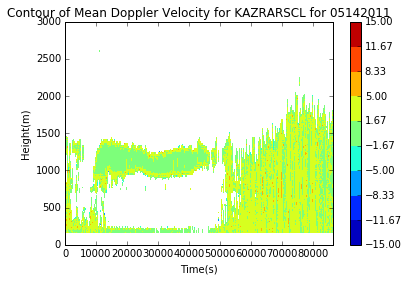

In [7]:
plt.contourf(tk,hk,v_k.T,levels=np.linspace(-15,15,10))
plt.colorbar()
plt.ylim(0,3000)
plt.xlabel('Time(s)')
plt.ylabel('Height(m)')
plt.title('Contour of Mean Doppler Velocity for KAZRARSCL for 05142011')
plt.show()

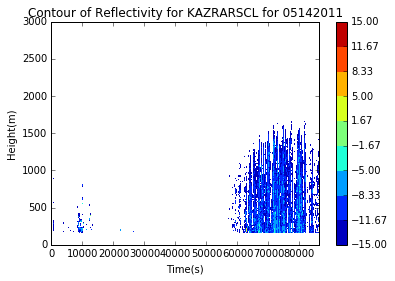

In [8]:
plt.contourf(tk,hk,ref_k.T,levels=np.linspace(-15,15,10))
plt.colorbar()
plt.ylim(0,3000)
plt.xlabel('Time(s)')
plt.ylabel('Height(m)')
plt.title('Contour of Reflectivity for KAZRARSCL for 05142011')
plt.show()

# 2
Aggregation of Data

In [9]:
tk1=tk[(tk>=10000) & (tk<=50000)]
tm1=tm[(tm>=10000) & (tm<=50000)]
tr1=tr[(tr>=10000) & (tr<=50000)]

In [10]:
def spatial_clustering(z1,z2):
    """
    z2 is the heights for the higher resolved data whereas
    z1 is the heights for the lower resolved data
    eg: z1-Raman Lidar
        z2-Microbase,KAZRARSCL
    """
    z_index=[]
    for i in range(len(z1)-1):
        arg=[]
        for j in range(len(z2)):
            if z2[j]>=z1[i] and z2[j]<=z1[i+1]:
                arg.append(j)
        z_index.append(arg)
    return z_index

In [11]:
def temporal_clustering(t1,t2):
    """
    t2 is the heights for the higher resolved data whereas
    t1 is the heights for the lower resolved data
    eg: t1-Raman Lidar
        t2-Microbase,KAZRARSCL
    """
    t_index=[]
    for i in range(len(t1)-1):
        arg=[]
        for j in range(len(t2)):
            if t2[j]>=t1[i] and t2[j]<=t1[i+1]:
                arg.append(j)
        t_index.append(arg)
    return t_index

In [24]:
def spatio_temporal_clustering(z1,z2,t1,t2,pars):
    """
    2 is the higher resolved data whereas
    1 is the lower resolved data
    eg: 1-Raman Lidar
        2-Microbase,KAZRARSCL
    pars: Parameter for which you have to cluster
    """ 
    hargs=spatial_clustering(z1,z2)
    targs=temporal_clustering(t1,t2)
    par_array=[]
    for i in targs:
        for j in hargs:
            e1=[]
            for m in i:
                for n in j:
                    e1.append(pars[m,n])
            par_array.append(e1)
    return par_array

In [28]:
def filtering(z1,z2,t1,t2,param):
    miss=param.missing_value
    pars=np.ma.filled(param[:])
    par=spatio_temporal_clustering(z1,z2,t1,t2,pars)
    avg=[]
    count=0
    for i in range(len(par)):
        for j in range(len(par[i])):
            par[i][j]=par[i][j][par[i][j]!=miss]
        avg.append(par[i][j].mean())
        count=count+1
    return avg

In [38]:
def plot_contour(z1,z2,t1,t2,param,xup=50000,xdown=10000,yup=1500,base=750,radar1='Raman Lidar',radar2='KAZRARSCL'\
                 ,name='Reflectivity'):
    par=filtering(z1,z2,t1,t2,param)
    rplot=np.array(par).reshape(len(t1)-1,len(z1)-1)
    plt.contourf(t1[1:],z1[1:],rplot.T)
    plt.colorbar()
    plt.xlim(xdown,xup)
    plt.ylim(base,yup)
    plt.title(f'Contour of {name} for {radar1} wrt {radar2}')
    plt.xlabel('Time(s)')
    plt.ylabel('Height(m)')
    plt.text((xup+xdown)/2,base*1.1,'Cloud base=750 m')
    plt.show()
    return None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.


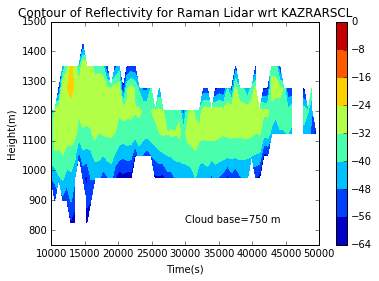

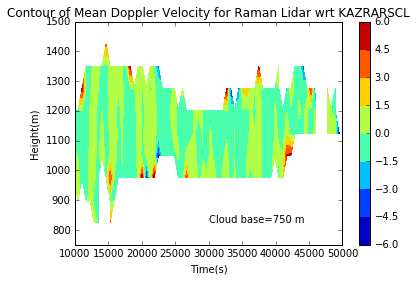

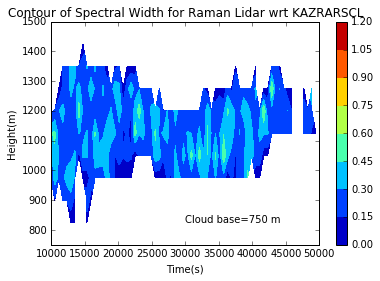

In [43]:
plot_contour(hr,hk,tr,tk,kazr['reflectivity'])
plot_contour(hr,hk,tr,tk,kazr['mean_doppler_velocity'],name='Mean Doppler Velocity')
plot_contour(hr,hk,tr,tk,kazr['spectral_width'],name='Spectral Width')

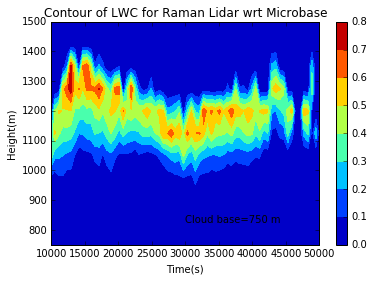

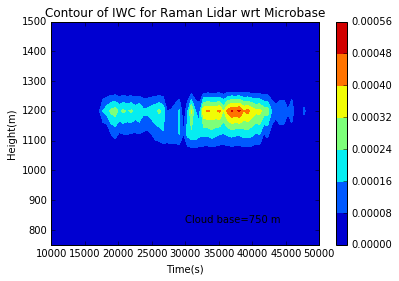

In [42]:
plot_contour(hr,hm,tr,tm,mbase['liquid_water_content'],radar2='Microbase',name='LWC')
plot_contour(hr,hm,tr,tm,mbase['ice_water_content'],radar2='Microbase',name='IWC')